In [1]:
import IP
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Problem One

Using the image ‘camera’ from skimage.data as A and a disk element B. Prove the following relationships:


In [42]:
A = IP.rgb2gray(IP.data.camera())
B = IP.disk(5)
A = IP.im2bw(A,60)

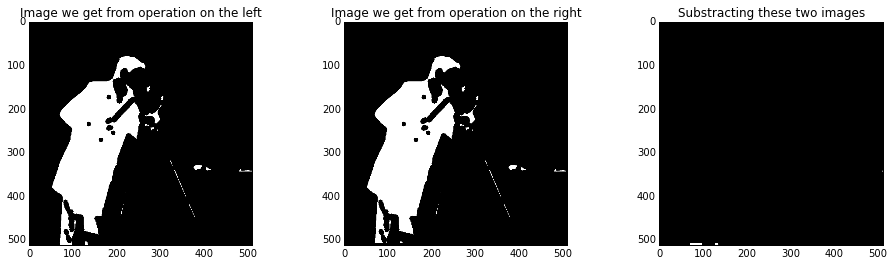

In [47]:
left_equ = 1 - IP.imdilate(A,B);
right_equ = IP.imerode(1-A,B);

fig,((ax1,ax2,ax3))=subplots(1,3,figsize=(16,4))

ax1.set_title('Image we get from operation on the left');
ax1.imshow(left_equ,cmap='gray');

ax2.set_title('Image we get from operation on the right');
ax2.imshow(right_equ,cmap='gray');

ax3.set_title('Substracting these two images');
ax3.imshow(abs(left_equ-right_equ),cmap='gray');

Ignoring the effects of the edges while we do morphological filtering, the images we got from the left and the right operation are the same.

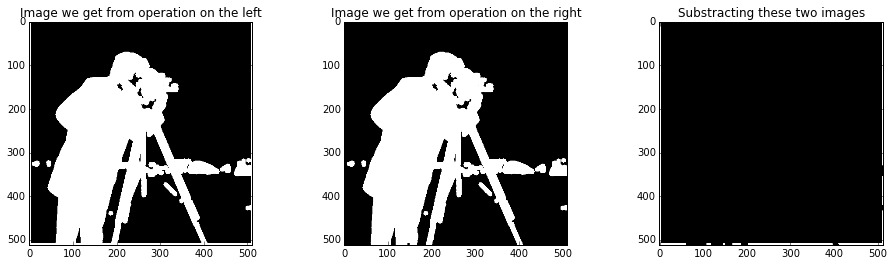

In [46]:
left_equ2 = 1 - IP.imerode(A,B);
right_equ2 = IP.imdilate(1-A,B);

fig,((ax1,ax2,ax3))=subplots(1,3,figsize=(16,4))

ax1.set_title('Image we get from operation on the left');
ax1.imshow(left_equ2,cmap='gray');

ax2.set_title('Image we get from operation on the right');
ax2.imshow(right_equ2,cmap='gray');

ax3.set_title('Substracting these two images');
ax3.imshow(abs(left_equ2-right_equ2),cmap='gray');

Again, as we expected, the operations on the left and right produce the same result.

##Problem Two

Use the image of Richard Feynman and with morphological operators, make an outline of the boundary.

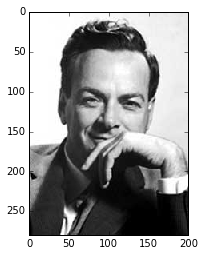

In [2]:
I1 = IP.rgb2gray(IP.imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW6/Feynman.jpg'))
IP.imshow(I1,cmap='gray')

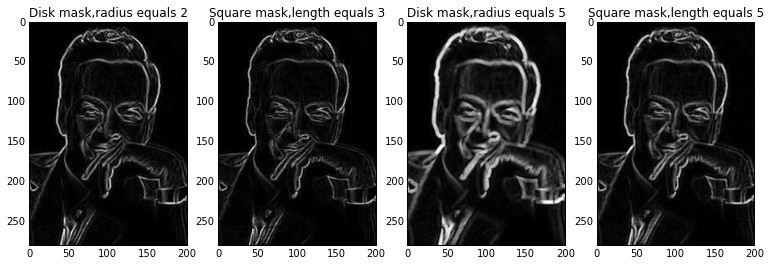

In [31]:
I2 = IP.gs_imerode(I1,IP.disk(2));
I3 = IP.gs_imerode(I1,IP.square(3));
I4 = IP.gs_imerode(I1,IP.disk(5));
I5 = IP.gs_imerode(I1,IP.square(5));

fig,((ax1,ax2,ax3,ax4))=subplots(1,4,figsize=(13,4))
ax1.imshow(I1-I2,aspect='auto',cmap='gray')
ax1.set_title('Disk mask,radius equals 2');
ax2.imshow(I1-I3,aspect='auto',cmap='gray')
ax2.set_title('Square mask,length equals 3');
ax3.imshow(I1-I4,aspect='auto',cmap='gray')
ax3.set_title('Disk mask,radius equals 5');
ax4.imshow(I1-I5,aspect='auto',cmap='gray')
ax4.set_title('Square mask,length equals 5');

First use erosion to shrink the image and then subtract it from the original image to obtain the outline. I think in this case,it doesn't have much difference in choosing square mask or circle mask,as long as we choose the right size, both kinds of mask can produce the result.

## Problem Three

Demonstrate that morphological operators can remove the shading artifact and thresholding the resulting figure will indeed produce an image similar to that shown in (c).

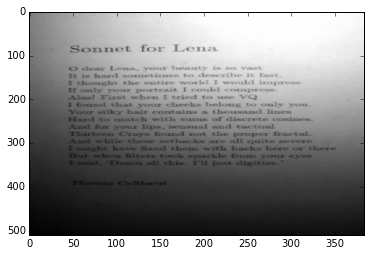

In [33]:
II = IP.rgb2gray(IP.imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW6/sonnet1.gif'))
imshow(II,cmap='gray',aspect='auto')

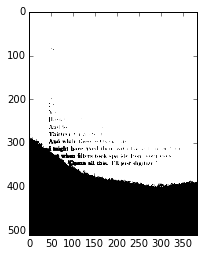

In [41]:
II_thre = IP.im2bw(II,80)
imshow(II_thre,cmap='gray')

We can see from the image ahead that, if the original image is corrupted by shading artifact, simpling threshold the image will not produce a satisfying result.Therefore we run the morphological processing before we do the thresholding.

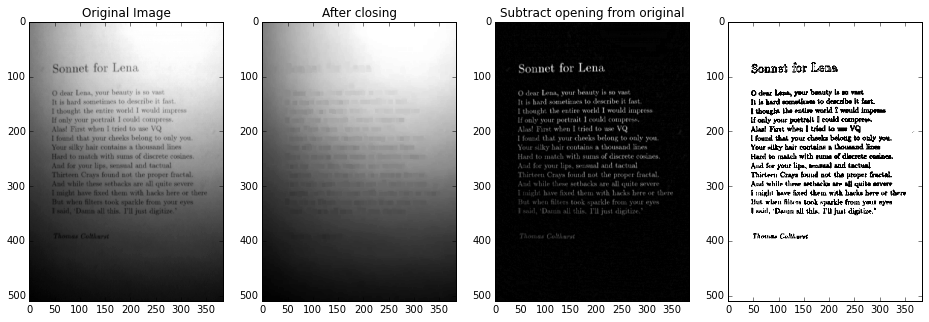

In [320]:
II1 = IP.gs_imclose(II,IP.square(7))
II2 = -II + II1
size = II2.shape
II3 = zeros((size[0],size[1]))
for i in range(0,size[0]):
    for j in range(0,size[1]):
        if II2[i,j]> 9 and II2[i,j]< 70:
            II3[i,j]=0;
        else:
            II3[i,j]=1
        
fig,((ax1,ax2,ax3,ax4))=subplots(1,4,figsize=(16,5))
ax1.imshow(II,cmap='gray',aspect='auto');
ax1.set_title('Original Image');
ax2.imshow(II1,cmap='gray',aspect='auto')
ax2.set_title('After closing');
ax3.imshow(II2,cmap='gray',aspect='auto')
ax3.set_title('Subtract opening from original')
ax4.imshow(II3,cmap='gray',aspect='auto')

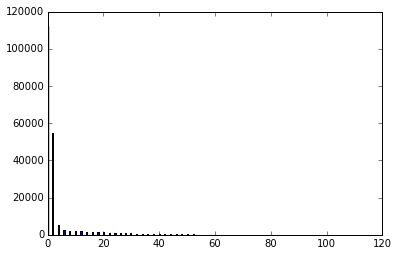

In [321]:
n,bins,patch = hist(II2.ravel(),bins = 256)

The histogram above is used to determind the range to threhold the image after morphological image processing. To reduce the shading artifact, I decided to use the Top-hat transformation. So I first closing the image, which is like creating the shading by myself, and then subtract the original image from the it. The purpose of doing this is to eliminate the shading. And then in order to do thresholding, I draw a histogram to see the itensity distribution of the iamge I get. At last I decide that the range should be within [9,70].

##Problem Four

#### Develop an algorithm to segment image

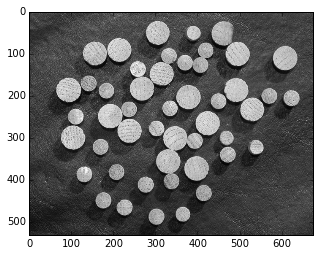

In [2]:
P = IP.rgb2gray(IP.imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW6/Im3.jpg'))
imshow(P,cmap='gray')

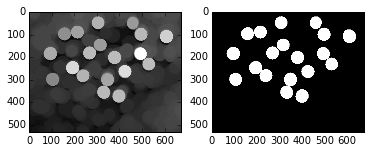

In [16]:
P1 = IP.gs_imopen(P,IP.disk(25))
subplot(121);imshow(P1,cmap='gray')
P11 = double(P1>60)
subplot(122);imshow(P11,cmap='gray')

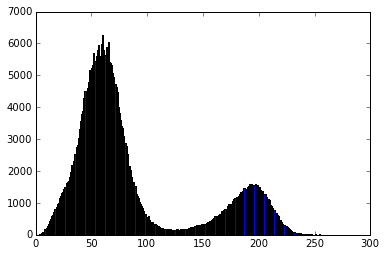

In [506]:
n,bins,patch = hist(P.ravel(),bins = 256)

To extract the large balls from the original image, I should do the smoothing first and then use morphlogiacal opening to enhance the itensity of the large balls. But once I just tried to do without the smoothing, and the image I got is satifying. The code below shows how I extract the small balls from the original image.

1.I first take the bonary image of the original image, and store it in Po.       Figure One

2.And then I subtract it from the P11, the binary image of the large circles.    Figure Two

3.Do thresholding the extract the small circles.                                 Figure Three

4.As we see,there are some extra white dots in the background.So I diceide to do the image opening operation on the image. Figure Five

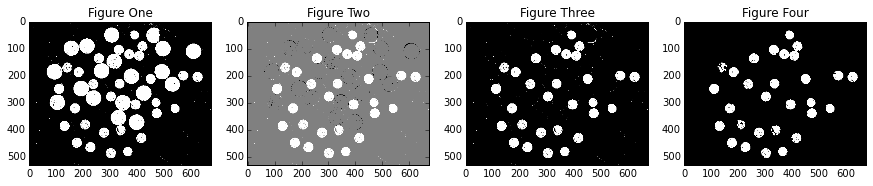

In [56]:
Po = double(P>130);
Po1 = Po - P11;
Po2 = double(Po1>0.8)
Po3 = IP.imopen(Po2,IP.disk(2))

fig,((ax1,ax2,ax3,ax4))=subplots(1,4,figsize=(15,6))
ax1.imshow(Po,cmap='gray')
ax1.set_title('Figure One')
ax2.imshow(Po1,cmap='gray')
ax2.set_title('Figure Two')
ax3.imshow(Po2,cmap='gray')
ax3.set_title('Figure Three')
ax4.imshow(Po3,cmap='gray')
ax4.set_title('Figure Four')

There are still some extra black dots inside the circle. So I dilate it. 

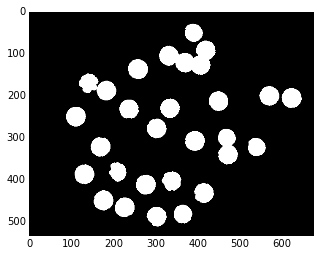

In [61]:
Po4 = IP.imdilate(Po3,IP.disk(5))
imshow(Po4,cmap='gray')

##Develop an algorithm for segmenting image4.jpg

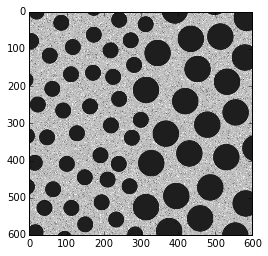

In [63]:
K = imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW6/Im4.jpg')
imshow(K,cmap='gray')

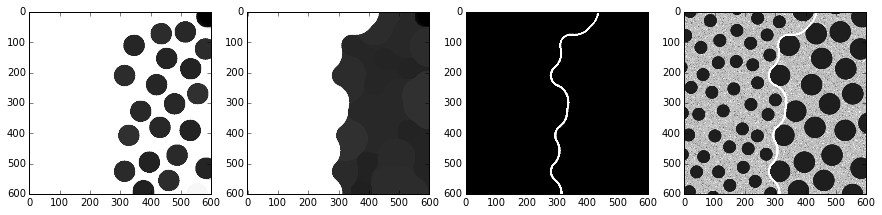

In [110]:
KK = IP.gs_imclose(K,IP.disk(35))
KK1 = IP.gs_imopen(KK,IP.disk(60))

KK1_dilate = IP.gs_imdilate(KK1,IP.disk(4))
KK1_erode = IP.gs_imerode(KK1,IP.disk(4))
KK1_gradient = KK1_dilate - KK1_erode
KK2_gradient = double(KK1_gradient>100)

fig,((ax1,ax2,ax3,ax4))=subplots(1,4,figsize=(15,6))
ax1.imshow(KK,cmap='gray')
ax2.imshow(KK1,cmap='gray')
ax3.imshow(KK2_gradient,cmap='gray')
ax4.imshow((1-KK2_gradient)*K+255*KK2_gradient,cmap='gray')

I first want to segment this image into two parts, one part with the small circle and the other with large circles. And in the first figure, I remove the small circles with 'image closing',in this way I successfully remove the small circles within the images.Here it might be a little confusing about why I romove something with 'closing' instead of 'opening',which comes erosion first. That's because the erosion can remove the extra white spot, while in our image the small circles we want to remove is in black. Therefore I have to use closing to remove the extra black circles with closing.

Then I try to get the outline of the area with large circles. And there are two steps:

1.The first is filling in the empty space between the large circles. As we mention in the previous paragraph that closing remove extra black area, I choose opening operator to fill in the empty space. 

2.Then I try to get the outline of those two areas by morphological gradient operation. 

3.At last I add the outline of the two areas into the original image. 

